In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm

In [2]:
data = pd.read_csv("iris.data",names=["Sepal Length", "Sepal Width","Petal Length" ,"Petal Width", "Class Label"])

In [3]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = data.drop_duplicates(keep='first')

In [5]:
y = data["Class Label"] 
x = data.drop("Class Label",axis = 1 )

In [6]:
x.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
def normalize(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    x_n = (x - mean)/std
    return x_n

In [8]:
x_norm = normalize(x)

In [9]:
col = x.columns

In [10]:
x = pd.DataFrame(x_norm, columns = col)


In [11]:
x.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02
mean,-2.443104e-15,-3.147898e-15,-1.380604e-15,-6.185528e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.877292e+00,-2.415930e+00,-1.580498e+00,-1.463097e+00
25%,-9.123902e-01,-5.853026e-01,-1.239417e+00,-1.199201e+00
50%,-6.810107e-02,-1.276458e-01,3.522961e-01,1.202791e-01
75%,6.555753e-01,5.588394e-01,7.502244e-01,7.800192e-01
max,2.464766e+00,3.075952e+00,1.773469e+00,1.703655e+00


In [12]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class Label, dtype: object

In [13]:
df = pd.concat([x,y],axis=1)

In [14]:
d = df.sample(frac = 1,random_state=42) #returns a randomly jumbles data
div = int(0.8 * d.shape[0])#calculate 80 percent of the number of input datapoints
d.loc[data['Class Label']=="Iris-setosa","Class Label"]=0
d.loc[data['Class Label']=="Iris-versicolor","Class Label"]=1
d.loc[data['Class Label']=="Iris-virginica","Class Label"]=2

d_train, d_test = d.iloc[:div,:], d.iloc[div:,:]#split the data into test and train
    
d_train_x = d_train.iloc[:,:-1].values#set training data featutre matrix
d_train_y = d_train.iloc[:,-1].values#set training data output label
d_test_x = d_test.iloc[:,:-1].values#set test data feature matrix
d_test_y = d_test.iloc[:,-1].values#set test data output label


In [15]:
d_train_x.shape

(117, 4)

In [16]:
d_train_y.shape


(117,)

In [17]:
d_train_y = d_train_y.astype("int")

In [27]:
clf = svm.SVC(kernel='linear')
clf.fit(d_train_x, d_train_y)
y_pred = clf.predict(d_test_x)
print("SVM with Linear kernel:",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

SVM with Linear kernel: [0.96666667]


In [28]:
clf = svm.SVC(kernel='poly',degree=2)
clf.fit(d_train_x, d_train_y)
y_pred = clf.predict(d_test_x)
print("SVM with quadratic kernel: ",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

SVM with quadratic kernel:  [0.86666667]


In [29]:
clf = svm.SVC(kernel='rbf')
clf.fit(d_train_x, d_train_y)
y_pred = clf.predict(d_test_x)

print("SVM with radial basis function kernel: ",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

SVM with radial basis function kernel:  [0.96666667]


In [31]:
from sklearn import neural_network

In [62]:
model = neural_network.MLPClassifier(hidden_layer_sizes =(16),solver='sgd',batch_size=32, alpha = 0.001,max_iter=2000 )
model.fit(d_train_x,d_train_y)
y_pred = model.predict(d_test_x)
print("Accuracy: ",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

Accuracy:  [0.96666667]


In [63]:
model = neural_network.MLPClassifier(hidden_layer_sizes =(256,16),solver='sgd',batch_size=32, alpha = 0.001,max_iter=2000 )
model.fit(d_train_x,d_train_y)
y_pred = model.predict(d_test_x)
print("Accuracy: ",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

Accuracy:  [0.96666667]


In [72]:
x=[]
for i in [0.1,0.01,0.001,0.0001,0.00001]:
    model = neural_network.MLPClassifier(hidden_layer_sizes =(16),solver='sgd',batch_size=32, alpha = 0.001,max_iter=2000 )
    model.fit(d_train_x,d_train_y)
    y_pred = model.predict(d_test_x)
    x.append(np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)
    

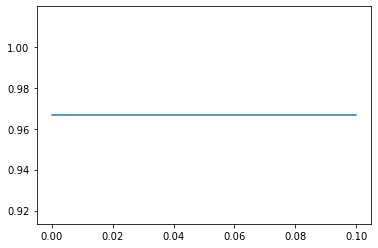

In [73]:
plt.plot([0.1,0.01,0.001,0.0001,0.00001],x)

In [74]:
x=[]
for i in [0.1,0.01,0.001,0.0001,0.00001]:
    model = neural_network.MLPClassifier(hidden_layer_sizes =(256,16),solver='sgd',batch_size=32, alpha = 0.001,max_iter=2000 )
    model.fit(d_train_x,d_train_y)
    y_pred = model.predict(d_test_x)
    x.append(np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)
    

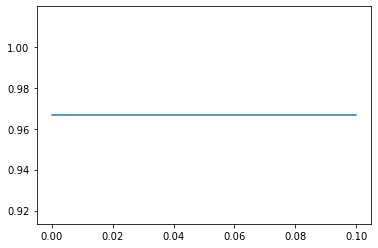

In [75]:
plt.plot([0.1,0.01,0.001,0.0001,0.00001],x)